In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
sy_clin_path = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/data/20210412-HXM-ypN0259RR.csv'
hn_clin_path = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/data/20210413-HXM-HNCH118RR.csv'
sy_ted_path= '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/BSV_notebook/data/SY_BSV_EDI_full.csv'
hn_ted_path = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/BSV_notebook/data/HN_BSV_EDI_full.csv'

sy_clin = pd.read_csv(sy_clin_path)
hn_clin = pd.read_csv(hn_clin_path)
sy_ted = pd.read_csv(sy_ted_path)
hn_ted = pd.read_csv(hn_ted_path)

print(sy_clin.shape, hn_clin.shape, sy_ted.shape, hn_ted.shape)

(259, 34) (118, 34) (224, 94) (111, 94)


In [63]:
sy_clin_224 = sy_clin.merge(sy_ted, on= 'ID').iloc[:,:sy_clin.shape[1]]
hn_clin_111 = hn_clin.merge(hn_ted, on= 'ID').iloc[:,:hn_clin.shape[1]]

sy_clin_224['combined_pCR'] = sy_ted.iloc[:,1] * sy_ted.iloc[:,2]
hn_clin_111['combined_pCR'] = hn_ted.iloc[:,1] * hn_ted.iloc[:,2]

sy_clin_224.to_csv('../data/BSV_SY_clinicaldata_224.csv',index=False)
hn_clin_111.to_csv('../data/BSV_HN_clinicaldata_111.csv',index=False)

In [64]:
sy_clin_224 = sy_clin.merge(sy_ted, on= 'ID')
hn_clin_111 = hn_clin.merge(hn_ted, on= 'ID')

sy_clin_224['combined_pCR'] = sy_ted.iloc[:,1] * sy_ted.iloc[:,2]
hn_clin_111['combined_pCR'] = hn_ted.iloc[:,1] * hn_ted.iloc[:,2]

sy_clin_224.to_csv('../data/BSV_SY_CDTED_224.csv',index=False)
hn_clin_111.to_csv('../data/BSV_HN_CDTED_111.csv',index=False)

In [25]:
SY_dir = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/data/BSV_CDTED_SY.csv'
HN_dir = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/data/BSV_CDTED_HN.csv'

df_SY_CDTED = pd.read_csv(SY_dir)
df_HN_CDTED = pd.read_csv(HN_dir)

In [124]:
df_SY_TED = df_SY_CDTED.iloc[:,18:]
df_HN_TED = df_HN_CDTED.iloc[:,18:]

df_SY_CD = df_SY_CDTED.iloc[:,8:18]
df_HN_CD = df_HN_CDTED.iloc[:,8:18]

#### Pearson correlation

In [125]:
from scipy.stats import pearsonr,spearmanr

key = []
value = []
CD = []
for i in range(df_SY_CD.shape[1]):
    for j in range(df_SY_TED.shape[1]):
        tmp_corr, _ = pearsonr(df_SY_CD.iloc[:,i].to_numpy(), df_SY_TED.iloc[:,j].to_numpy())
        tmp_key = df_SY_CD.columns[i] + '_' + df_SY_TED.columns[j]
        value.append(tmp_corr)
        key.append(tmp_key)
        CD.append(df_HN_CD.columns[i])
df_sy = pd.DataFrame({'corr_key':key,'corr_value':value,'Clinical variable':CD})
df_sy.to_csv('../data/BSV_SY_PearsonCorr_224.csv',index=False)
# print(df_sy[df_sy['cor_value']>0.2])

key = []
value = []
CD = []
for i in range(df_HN_CD.shape[1]):
    for j in range(df_HN_TED.shape[1]):
        tmp_corr, _ = pearsonr(df_HN_CD.iloc[:,i].to_numpy(), df_HN_TED.iloc[:,j].to_numpy())
        tmp_key = df_HN_CD.columns[i] + '_' + df_HN_TED.columns[j]
        value.append(tmp_corr)
        key.append(tmp_key)
        CD.append(df_HN_CD.columns[i])
df_hn = pd.DataFrame({'corr_key':key,'corr_value':value,'Clinical variable':CD})
df_hn.to_csv('../data/BSV_HN_PearsonCorr_111.csv',index=False)
# print(df_hn[df_hn['cor_value']>0.2])

/Users/shizhenwei/anaconda3/envs/mma/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [145]:
print(df_sy['corr_value'].min(),df_sy['corr_value'].max())
print(df_hn['corr_value'].min(),df_hn['corr_value'].max())

print(df_sy[df_sy['Clinical variable']=='pre_cT_stage']['corr_value'].min(),df_sy[df_sy['Clinical variable']=='pre_cT_stage']['corr_value'].max())
print(df_hn[df_hn['Clinical variable']=='pre_cT_stage']['corr_value'].min(),df_hn[df_hn['Clinical variable']=='pre_cT_stage']['corr_value'].max())

-0.4512611528184908 0.30361371565819856
-0.3846937879154098 0.3348267447918615
-0.4512611528184908 0.22825096872176953
-0.3816110254749338 0.3348267447918615


In [146]:
df_sy[df_sy['Clinical variable']=='pre_cT_stage']['corr_value'].min()

-0.4512611528184908

/Users/shizhenwei/anaconda3/envs/mma/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shizhenwei/anaconda3/envs/mma/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


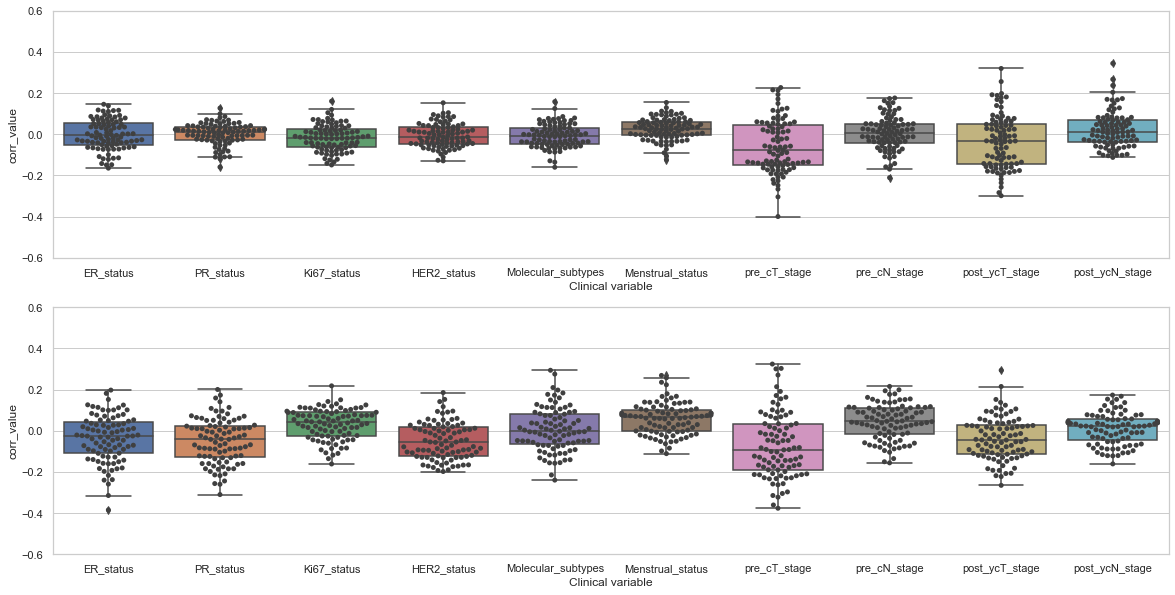

In [132]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
# ax=axes[0, 0]
ax0 = sns.boxplot(ax=axes[0],x="Clinical variable", y="corr_value", data=df_sy)
ax0 = sns.swarmplot(ax=axes[0],x="Clinical variable", y="corr_value", data=df_sy, color=".25")
ax0.set_ylim([-0.6, 0.6])
ax1 = sns.boxplot(ax=axes[1],x="Clinical variable", y="corr_value", data=df_hn)
ax1 = sns.swarmplot(ax=axes[1],x="Clinical variable", y="corr_value", data=df_hn, color=".25")
ax1.set_ylim([-0.6, 0.6])

plt.savefig('./results/BCSV_TEDcorCD_pearson.eps')

#### Spearman correlation

In [133]:
key = []
value = []
CD = []
for i in range(df_SY_CD.shape[1]):
    for j in range(df_SY_TED.shape[1]):
        tmp_corr, _ = spearmanr(df_SY_CD.iloc[:,i].to_numpy(), df_SY_TED.iloc[:,j].to_numpy())
        tmp_key = df_SY_CD.columns[i] + '_' + df_SY_TED.columns[j]
        value.append(tmp_corr)
        key.append(tmp_key)
        CD.append(df_HN_CD.columns[i])
df_sy = pd.DataFrame({'corr_key':key,'corr_value':value,'Clinical variable':CD})
df_sy.to_csv('../data/BSV_SY_SpearmanCorr_224.csv',index=False)
# print(df_sy[df_sy['cor_value']>0.2])

key = []
value = []
CD = []
for i in range(df_HN_CD.shape[1]):
    for j in range(df_HN_TED.shape[1]):
        tmp_corr, _ = spearmanr(df_HN_CD.iloc[:,i].to_numpy(), df_HN_TED.iloc[:,j].to_numpy())
        tmp_key = df_HN_CD.columns[i] + '_' + df_HN_TED.columns[j]
        value.append(tmp_corr)
        key.append(tmp_key)
        CD.append(df_HN_CD.columns[i])
df_hn = pd.DataFrame({'corr_key':key,'corr_value':value,'Clinical variable':CD})
df_hn.to_csv('../data/BSV_HN_SpearmanCorr_111.csv',index=False)
# print(df_hn[df_hn['cor_value']>0.2])


/Users/shizhenwei/anaconda3/envs/mma/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


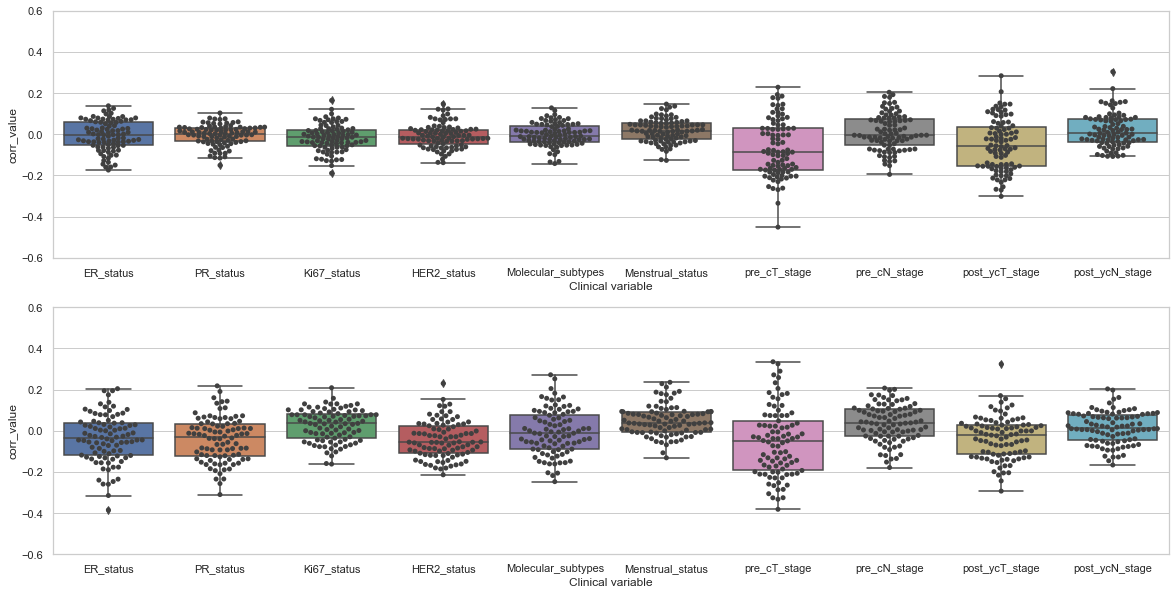

In [134]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

plt.ylim(-0.8,0.8)
sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
# ax=axes[0, 0]
ax0 = sns.boxplot(ax=axes[0],x="Clinical variable", y="corr_value", data=df_sy)
ax0 = sns.swarmplot(ax=axes[0],x="Clinical variable", y="corr_value", data=df_sy, color=".25")
ax0.set_ylim([-0.6, 0.6])
ax1 = sns.boxplot(ax=axes[1],x="Clinical variable", y="corr_value", data=df_hn)
ax1 = sns.swarmplot(ax=axes[1],x="Clinical variable", y="corr_value", data=df_hn, color=".25")
ax1.set_ylim([-0.6, 0.6])

plt.savefig('./results/BCSV_TEDcorCD_spearman.eps')

In [217]:
from scipy.stats import mannwhitneyu
iTED_all_SY_B_dir = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/BSV_notebook/data/iTED_all_SY_B.csv'
iTED_all_HN_B_dir = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/BSV_notebook/data/iTED_all_HN_B.csv'

iTED_all_SY_B = pd.read_csv(iTED_all_SY_B_dir)
iTED_all_HN_B = pd.read_csv(iTED_all_HN_B_dir)

label1 = (iTED_all_SY_B['breast_pCR']==1)
label0 = (iTED_all_SY_B['breast_pCR']==0)

_, p_SY_B = mannwhitneyu(iTED_all_SY_B.loc[label0,'iTED_all'], iTED_all_SY_B.loc[label1,'iTED_all'], alternative='two-sided')
print('Mann-Whitney U rank test SY_B: ', p_SY_B)

label1 = (iTED_all_HN_B['breast_pCR']==1)
label0 = (iTED_all_HN_B['breast_pCR']==0)

_, p_HN_B = mannwhitneyu(iTED_all_HN_B.loc[label0,'iTED_all'], iTED_all_HN_B.loc[label1,'iTED_all'], alternative='two-sided')
print('Mann-Whitney U rank test HN_B: ',p_HN_B)


Mann-Whitney U rank test SY_B:  0.2217353727109912
Mann-Whitney U rank test HN_B:  0.8080427223267609


In [229]:
from scipy.stats import mannwhitneyu
from scipy.stats import ranksums

iTED_all_SY_B_dir = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/BSV_notebook/data/iTED_all_SY_B.csv'
iTED_all_HN_B_dir = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/BSV_notebook/data/iTED_all_HN_B.csv'

iTED_all_SY_B = pd.read_csv(iTED_all_SY_B_dir)
iTED_all_HN_B = pd.read_csv(iTED_all_HN_B_dir)

iTED_all_B = pd.concat([iTED_all_SY_B,iTED_all_HN_B],axis=0)

label1 = (iTED_all_B['breast_pCR']==1)
label0 = (iTED_all_B['breast_pCR']==0)

_, p_SY_B = mannwhitneyu(iTED_all_B.loc[label0,'iTED_all'], iTED_all_B.loc[label1,'iTED_all'], alternative='two-sided')
print('Mann-Whitney U rank test The whole cohort B: ', p_SY_B)



Mann-Whitney U rank test The whole cohort B:  0.0251614747174248


In [223]:

iTED_all_B = pd.concat([iTED_all_SY_B,iTED_all_HN_B],axis=0)
iTED_all_B.shape

(336, 6)

In [219]:
iTED_all_SY_C_dir = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/BSV_notebook/data/iTED_all_SY_C.csv'
iTED_all_HN_C_dir = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/BSV_notebook/data/iTED_all_HN_C.csv'

iTED_all_SY_C = pd.read_csv(iTED_all_SY_C_dir)
iTED_all_HN_C = pd.read_csv(iTED_all_HN_C_dir)

label1 = (iTED_all_SY_C['combined_pCR']==1)
label0 = (iTED_all_SY_C['combined_pCR']==0)

_, p_SY_C = mannwhitneyu(iTED_all_SY_C.loc[label0,'iTED_all'], iTED_all_SY_C.loc[label1,'iTED_all'], alternative='two-sided')


print('Mann-Whitney U rank test SY_C: ',p_SY_C)

label1 = (iTED_all_HN_C['combined_pCR']==1)
label0 = (iTED_all_HN_C['combined_pCR']==0)

_, p_HN_C = mannwhitneyu(iTED_all_HN_C.loc[label0,'iTED_all'], iTED_all_HN_C.loc[label1,'iTED_all'], alternative='two-sided')
print('Mann-Whitney U rank test HN_C: ',p_HN_C)

Mann-Whitney U rank test SY_C:  0.0020059850786470893
Mann-Whitney U rank test HN_C:  0.9473848056433593


In [231]:
iTED_all_SY_C_dir = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/BSV_notebook/data/iTED_all_SY_C.csv'
iTED_all_HN_C_dir = '/Users/shizhenwei/Documents/ProjectCode/Image_prcessing/super_voxel/BSV_notebook/data/iTED_all_HN_C.csv'

iTED_all_SY_C = pd.read_csv(iTED_all_SY_C_dir)
iTED_all_HN_C = pd.read_csv(iTED_all_HN_C_dir)

iTED_all_C = pd.concat([iTED_all_SY_C,iTED_all_HN_C],axis=0)

label1 = (iTED_all_C['combined_pCR']==1)
label0 = (iTED_all_C['combined_pCR']==0)

_, p_all_C = mannwhitneyu(iTED_all_C.loc[label0,'iTED_all'], iTED_all_C.loc[label1,'iTED_all'], alternative='two-sided')
print('Mann-Whitney U rank test the whole cohort C: ',p_all_C)

ranksums(iTED_all_C.loc[label0,'iTED_all'], iTED_all_C.loc[label1,'iTED_all'],alternative='two-sided')


Mann-Whitney U rank test the whole cohort C:  0.001464004365710317


RanksumsResult(statistic=-2.2858628998695836, pvalue=0.02226228048798787)

In [216]:
from sklearn import metrics
prob_SY_C = 1/(1+np.exp(-iTED_all_SY_C['iTED_all']))
prob_HN_C = 1/(1+np.exp(-iTED_all_HN_C['iTED_all']))

metrics.roc_auc_score(iTED_all_SY_C['combined_pCR'], prob_SY_C)
# metrics.confusion_matrix(iTED_all_SY_C['breast_pCR'], prob_SY_C)

0.48836726215205645

In [207]:
iTED_all_SY_C['breast_pCR']

0      1
1      0
2      0
3      0
4      1
      ..
219    1
220    0
221    1
222    0
223    0
Name: breast_pCR, Length: 224, dtype: int64